In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
print(df.columns)



Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')


In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv('/content/drive/MyDrive/Dataset/Plant_1_Weather_Sensor_Data.csv')


df = df.fillna(method='ffill')


scaler = MinMaxScaler()
df[['Solar Radiation (W/m²)', 'Energy Generated (kWh)']] = scaler.fit_transform(
    df[['MODULE_TEMPERATURE', 'MODULE_TEMPERATURE']]
)

print(df.head())


             DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  Solar Radiation (W/m²)  \
0           22.857507          0.0                0.099506   
1           22.761668          0.0                0.097484   
2           22.592306          0.0                0.093911   
3           22.360852          0.0                0.089029   
4           22.165423          0.0                0.084906   

   Energy Generated (kWh)  
0                0.099506  
1                0.097484  
2                0.093911  
3                0.089029  
4                0.084906  


<ipython-input-10-957a744983dd>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv('/content/drive/MyDrive/Dataset/Plant_1_Weather_Sensor_Data.csv')


df = df.fillna(method='ffill')

features_to_scale = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
scaler = MinMaxScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print("Scaled Features Preview:")
print(df[features_to_scale].head())


Scaled Features Preview:
   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
0             0.322190            0.099506          0.0
1             0.315477            0.097484          0.0
2             0.305457            0.093911          0.0
3             0.299423            0.089029          0.0
4             0.284302            0.084906          0.0


<ipython-input-11-df51e65f22d1>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


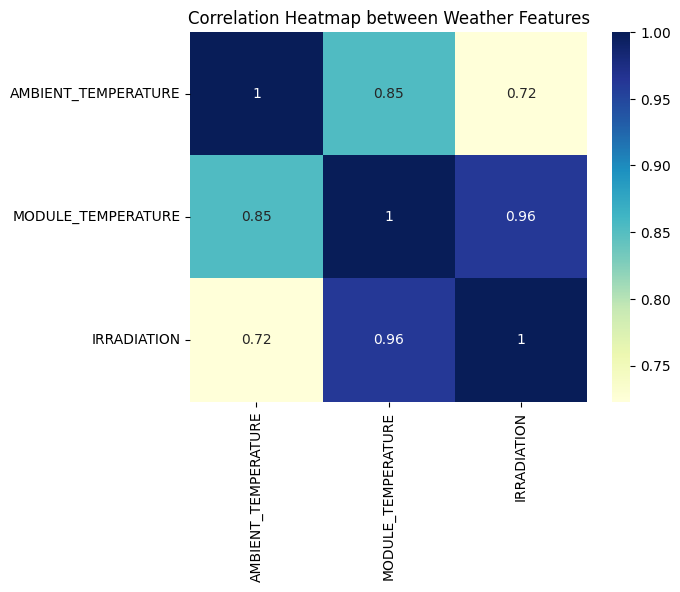

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[features_to_scale].corr()

sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap between Weather Features')
plt.show()


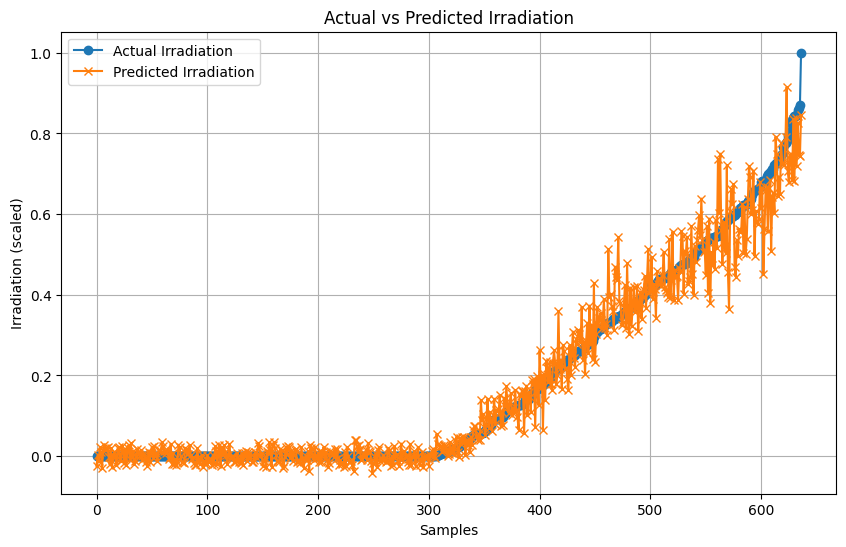

In [15]:
import numpy as np
sorted_indices = np.argsort(y_test.values)
sorted_y_true = y_test.values[sorted_indices]
sorted_y_pred = y_pred[sorted_indices]

plt.figure(figsize=(10,6))
plt.plot(sorted_y_true, label='Actual Irradiation', marker='o')
plt.plot(sorted_y_pred, label='Predicted Irradiation', marker='x')
plt.title('Actual vs Predicted Irradiation')
plt.xlabel('Samples')
plt.ylabel('Irradiation (scaled)')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features (X) and Target (y)
X = df[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']]
y = df['IRRADIATION']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse:.5f}")


Mean Squared Error on Test Data: 0.00222


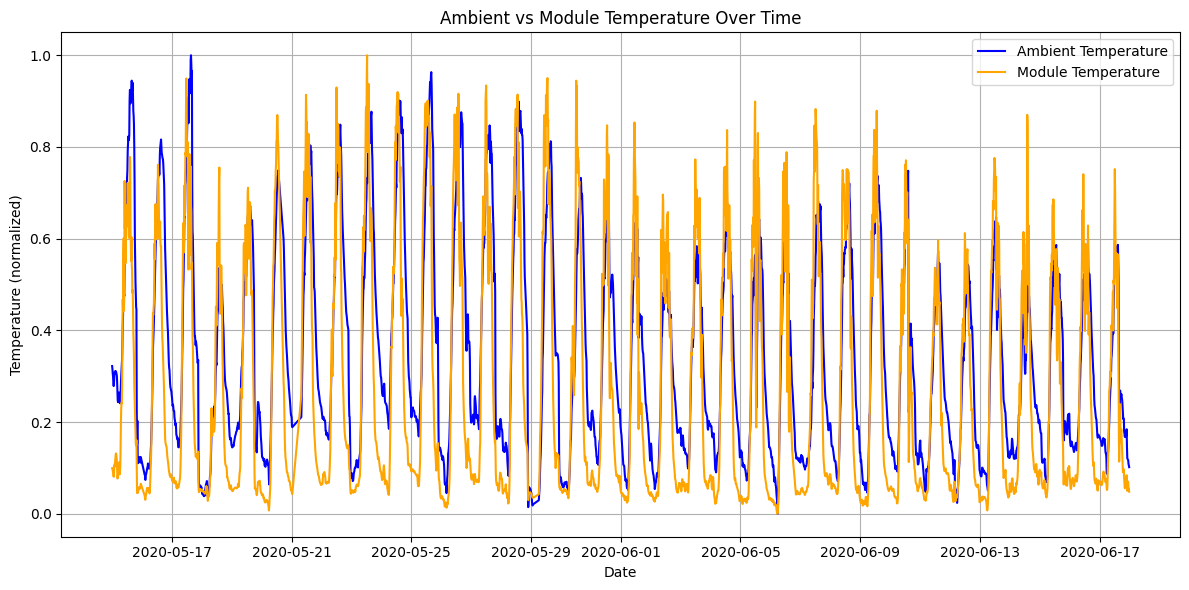

In [17]:
import matplotlib.pyplot as plt

# Convert 'DATE_TIME' column to datetime format
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])

# Plot
plt.figure(figsize=(12,6))
plt.plot(df['DATE_TIME'], df['AMBIENT_TEMPERATURE'], label='Ambient Temperature', color='blue')
plt.plot(df['DATE_TIME'], df['MODULE_TEMPERATURE'], label='Module Temperature', color='orange')
plt.title('Ambient vs Module Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (normalized)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
